# Probability, statistics, and information theory: exercise tasks

In [1]:
from helpers import *

# Univariate data

## Task 1: Specifying a univariate Gaussian 
The code in the cell below creates plot of a probability density function (pdf) of a 
univariate Gaussian whose parameter values can be (re)set interactively.

Play with setting the parameter values, and select parameter values that are different from the default ones. 

In the 'Answer'-section, briefly describe in the empty cell i) what do the parameters mean/control, ii) how does changing them can be seen from the plot, and iii) what parameter values did you choose

In [2]:
interactive_plot = plot_and_specify_univariate_gaussian_interactively()
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='$\\mu$', max=2.0, min=-2.0, step=0.5), FloatSlider(v…

In [3]:
mu, sigma, _, __ = interactive_plot.result # extracts the parameter values from the interactive plot instance 

### Answer
Input your answers to the cell below.

The mu is the mean of the bell curve, changing it moves the mean of the curve. Sigma is the width of the curve. Trying i.e mu = 1 moves the mean from 0.0 to 1.0. Sigma = 0.5 makes the curve sharper, meaning the mean is less varied.

## Task 2: Sampling from the distribution 
Now let's draw a bunch of samples from the distribution and look what kind of values did we get out.

The following cell i) draws samples from the distribution, ii) calculates a normalized histogram of the samples (to get an approximate representation of the density of the sample values), iii) plots the distribution we are sampling from (in blue) and the obtained normalized histogram (in magenta with a bar plot and in cyan using a curve). 

Play with the values of the variables 'num_samples' (default is 10) and 'num_bins' (default is 10).  

Change their values so that the match between the blue coloured curve (true density) and the cyan coloured curve (density representation of samples via a normalized histogram) is improved, ideally good.

In the 'Answer'-section, briefly describe in the empty cell how did you change the parameter values and why did they result in a better result.

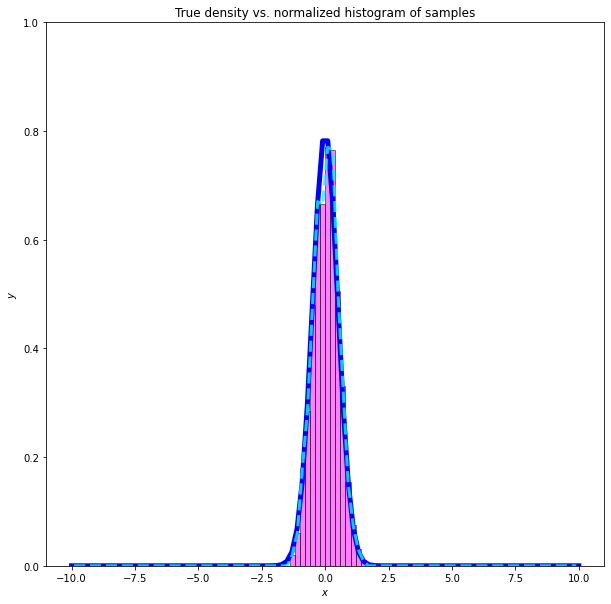

In [21]:
# sample from the distribution
num_samples = 1000
samples = mu+sigma*np.random.randn(num_samples)

# get an approximate representation of the density 
num_bins = 100
bin_centers, normalized_bin_counts = histogram_estimation_of_univariate_data_density(samples, nbins=num_bins)

# plot the true density and the histogram based approximate density
_,__, fig, ax = plot_univariate_gaussian_pdf(mu, sigma)
ax.plot(bin_centers, normalized_bin_counts, linestyle='dashed', color='cyan', linewidth=3, alpha=0.8)
ax.bar(bin_centers, normalized_bin_counts, width=20./num_bins, color='magenta', 
       edgecolor='black' if num_bins<= 100 else 'magenta', alpha=0.5)
ax.set_title('True density vs. normalized histogram of samples');

### Answer
Input your answers to the cell below.

Setting samples to a higher number seems to make a more "contained" graph, less edge cases probably, or they are more evened out when there is a bigger sample size. Changing num_bins to a higher number seems to make the approximation of density closer to the bell curve, so a better approximation.

## Task 3: Estimating true parameter values based on data samples
Now let's estimate true parameter values of the distribution, from a set of samples from the true distribution. Let us do that for a varying amount of samples, and let us also assess estimation effectiveness for each case. Let us assess the effectiveness by comparing true and estimated parameter values, and the KL-divergence between the true and the estimated distribution.

Codes for doing all of that is provided in the cell below. Your task is to replace
the parameter estimators to be better ones, ideally the best ones; there are two lines
of code that you should change, one starting with 'mu_estimate = ' and the other starting
with 'sigma_estimate = ', the ones between the two lines containing comment 'CHANGE CODE'.

In the 'Answer'-section, briefly describe i) your changes, ii) how and why did the results improve, and iii) the dependency on the estimation effectiveness to the amount of samples used when considering the improved approach.

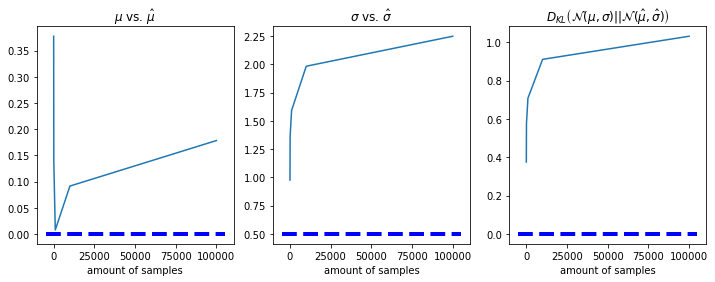

In [22]:
num_samples_list = [10**1, 10**2, 10**3, 10**4, 10**5]
num_samples_cases = len(num_samples_list)
mu_estimates = np.empty((num_samples_cases,), dtype=float)
sigma_estimates = np.empty((num_samples_cases,), dtype=float)
kl_divergences = np.empty((num_samples_cases,), dtype=float)

# get samples, estimate parameters, assess effectiveness: 
# loop over the varying case of differing amount of samples
# ----------------------------------------------------------

for num_samples_case_index, num_samples in enumerate(num_samples_list):
    # sample from the distribution
    samples = mu+sigma*np.random.randn(num_samples)
    
    # estimate parameter values from the distribution
    ###########################################################################
    # ----------> CHANGE CODE: IMPROVE THE ESTIMATORS, IF IMPROVING IS POSSIBLE
    mu_estimate = (samples.min()+samples.max())/2 
    sigma_estimate = (samples.max()-samples.min())/2 
    # < --------- CHANGE CODE 
    ###########################################################################
    
    # calculate KL-divergence between true and estimated distribution
    kl_div = kl_divergence_between_two_univariate_gaussians(mu, sigma, mu_estimate, sigma_estimate)
    
    # record the obtained parameter values and the KL-divergence
    mu_estimates[num_samples_case_index] = mu_estimate
    sigma_estimates[num_samples_case_index] = sigma_estimate
    kl_divergences[num_samples_case_index] = kl_div
    
# plot results
# -------------
# create figure infrastructure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[12, 4], gridspec_kw={'height_ratios': [1]})

# plot mu vs mu_estimated
ax1.plot(np.array(num_samples_list), mu_estimates); xlim = ax1.get_xlim()
ax1.hlines(mu, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax1.set_title(r'$\mu$ vs. $\hat{\mu}$'); ax1.set_xlabel('amount of samples')

# plot sigma vs sigma_estimated
ax2.plot(np.array(num_samples_list), sigma_estimates); xlim = ax2.get_xlim()
ax2.hlines(sigma, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax2.set_title(r'$\sigma$ vs. $\hat{\sigma}$'); ax2.set_xlabel('amount of samples')

# plot KL-divergence (p_true || p_estimated)
ax3.plot(np.array(num_samples_list), kl_divergences); xlim = ax3.get_xlim()
ax3.hlines(0, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax3.set_title(r'$D_{KL}\left(\mathcal{N}(\mu, \sigma) \|| \mathcal{N}(\hat{\mu}, \hat{\sigma})\right)$')
ax3.set_xlabel('amount of samples');

### Answer
Input your answers to the cell below.

# Multivariate data
Similar as above, but for multivariate (bivariate) data.

## Task 4: Specifying a multivariate Gaussian 
The code in the cell below creates a plot of a probability density function (pdf) of a 
bivariate Gaussian whose parameter values can be (re)set interactively.

Play with setting the parameter values, and select parameter values that are different from the default ones. 

In the 'Answer'-section, briefly describe in the empty cell i) what do the parameters mean/control, ii) how does changing them can be seen from the plot, and iii) what parameter values did you choose

In [ ]:
interactive_plot = plot_and_specify_bivariate_gaussian_interactively()
interactive_plot

In [ ]:
mu, K, _, __ = interactive_plot.result # extracts the parameter values from the interactive plot instance 

### Answer
Input your answers to the cell below.

## Task 5: Sampling from the distribution and estimating true parameter values based on the samples
Now let's draw a bunch of samples from the (chosen) distribution, and based on them, let's estimate the true parameter values of the distribution. Let us do that for a varying amount of samples, and let us also assess estimation effectiveness for each case. Let us assess the effectiveness by comparing the true and estimated parameter values, and the KL-divergence between the true and the estimated distribution.

Codes for doing all of that is provided in the cell below. Your task is to replace
the parameter estimators to be better ones, ideally the best ones; there are two lines
of code that you should change, one starting with 'mu_estimate = ' and the other starting
with 'K_estimate = ', the ones between the two lines containing comment 'CHANGE CODE'.

In the 'Answer'-section, briefly describe i) your changes, ii) how and why did the results improve, and iii) the dependency on the estimation effectiveness to the amount of samples used when considering the improved approach. 

In [ ]:
num_samples_list = [10**1, 10**2, 10**3, 10**4, 10**5]
num_samples_cases = len(num_samples_list)
mu_estimates = np.empty((num_samples_cases, 2), dtype=float)
kl_divergences = np.empty((num_samples_cases,), dtype=float)

# get samples, estimate parameters, assess effectiveness: 
# loop over the varying case of differing amount of samples
# ----------------------------------------------------------

for num_samples_case_index, num_samples in enumerate(num_samples_list):
    # sample from the distribution
    samples = np.random.multivariate_normal(mean=mu.flatten(), cov=K, size=num_samples)
    
    # estimate parameter values from the distribution
    ###########################################################################
    # ----------> CHANGE CODE: IMPROVE THE ESTIMATORS, IF IMPROVING IS POSSIBLE
    mu_estimate = 0.5*(np.min(samples, axis=0)+np.max(samples, axis=0)) 
    K_estimate = np.var(samples[:])*np.eye(2) # np.diag(np.var(samples, axis=0))
    # < --------- CHANGE CODE 
    ###########################################################################
    
    # calculate KL-divergence between the true and estimated distribution
    kl_div = kl_divergence_between_two_multivariate_gaussians(mu, K, mu_estimate, K_estimate)
    
    # record the obtained parameter values, the KL-divergence, and the normalized log-likelihood
    mu_estimates[num_samples_case_index, :] = mu_estimate.copy()
    kl_divergences[num_samples_case_index] = kl_div
    
# plot results
# -------------

# create figure infrastructure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[12, 4], gridspec_kw={'height_ratios': [1]})

# plot mu vs mu_estimated
ax1.plot(mu_estimates[:, 0], mu_estimates[:, 1], label='estimated') 
for num_samples_case_index, num_samples in enumerate(num_samples_list):
    ax1.text(mu_estimates[num_samples_case_index, 0], mu_estimates[num_samples_case_index, 1], str(num_samples))
ax1.plot(mu[0, 0], mu[0, 1], 'x', color='r', markersize=10, label='true')
ax1.set_xlabel(r'$x_1$'); ax1.set_ylabel(r'$x_2$') 
ax1.set_title(r'$\mu$ vs. $\hat{\mu}$'); ax1.legend()

# plot KL-divergence (p_true || p_estimated)
ax2.plot(np.array(num_samples_list), kl_divergences); xlim = ax2.get_xlim()
ax2.hlines(0, xlim[0], xlim[1], linestyle='dashed', colors=['b'], linewidth=4)
ax2.set_title(r'KL-divergence $D_{KL}\left(\mathcal{N}(\mu, \Sigma) \|| \mathcal{N}(\hat{\mu}, \hat{\Sigma})\right)$')
ax2.set_xlabel(r'amount of samples');

### Answer
Input your answers to the cell below.